In [2]:
from urllib import request
from bs4 import BeautifulSoup
import pandas as pd
import re

dfs = {'baseball':pd.DataFrame(),'football':pd.DataFrame(),'basketball':pd.DataFrame()}

df_all = pd.DataFrame()

for year in range(2007,2016+1):
       
    for sport in ['baseball','football','basketball']:
        print(sport,year)
        links = {
            'baseball': 'https://en.wikipedia.org/wiki/{}_NCAA_Division_I_baseball_rankings'.format(str(year+1)),
            'football': 'https://en.wikipedia.org/wiki/{}_NCAA_Division_I_FBS_football_rankings'.format(str(year)),
            'basketball': 'https://en.wikipedia.org/wiki/{}%E2%80%93{}_NCAA_Division_I_men%27s_basketball_rankings'.format(str(year),str(year+1)[-2:].zfill(2))
            }

   
        soup = BeautifulSoup(request.urlopen(url=links[sport]).read())

        df = pd.read_html(str(soup.find(id=['AP_Poll','AP_poll','Collegiate_Baseball','Collegiate_Baseball_Poll']).find_next('table')))[0]

        columns = ['RK']
        columns.extend(df.loc[0][1:])
        df.columns = columns
        df['SEASON'] = year
        df['SPORT'] = sport

        df_all = df_all.append(pd.melt(df[df.RK.notnull()],id_vars=['RK','SEASON','SPORT'], 
                                       value_vars = [row for row in df.columns if str(row) not in ('SPORT','SEASON','nan','RK')], 
                                       var_name = 'WEEK', value_name = 'TEAM')).dropna()
        
df_all['WEEK_PARSED'] = df_all.WEEK.map(lambda x: x.split('[')[0].split())
df_all['WEEK_NUM'] = df_all['WEEK_PARSED'].map(lambda x: x[0] if len(x) == 3 else x[1] )
df_all['TEAM_PARSED'] = df_all.TEAM.map(lambda x: x.replace('–','').replace('State','St').replace('.','').replace('ʻ','').replace('’',"'").replace('т','').split('(')[0].split('(')[0].split('(')[0].strip())
df_all.TEAM_PARSED = df_all.TEAM_PARSED.map(lambda x: x[0:re.search("\d", x).start()].strip() if re.search("\d", x) != None else x )
df_all.TEAM_PARSED = df_all.TEAM_PARSED.map(lambda x: x.replace('Cal state Fullerton','Cal St Fullerton').replace('Southern California','USC').replace('Louisvlle','Louisville').replace('Lousiville','Louisville').replace('louisville','Louisville'))



##END OF DATA SCRAPING


##LOGO SCRAPING
import requests
from io import BytesIO
from IPython.display import Image, display
import requests
from time import sleep

def getLogo(school,schoolKey=None):
    sleep(.3)
    school_p = school.lower().replace(' ','-')

    if schoolKey:
        school = schoolKey
    
    img = 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/%s/%s.40.png'%(school_p[0],school_p)
    
    session = requests.Session()
    response = session.get(img, headers={'User-Agent': 'Mozilla/5.0'})

    if response.status_code == 200:
        logos[school] = img
        with open('./data/logos/' + school + '.png', 'wb') as f:
            f.write(response.content)
        return True
    else:
        return False

logos = {}
schools = sorted(list(df_all.TEAM_PARSED.unique()))

for school in schools:
    getLogo(school)

provider = 'bing'
for school in [team for team in schools if team not in logos]:
    sleep(5)
    lnk = 'https://www.' + provider + '.com/search?q=site:ncaa.com/schools+{}&gbv=1&sei=YwHNVpHLOYiWmQHk3K24Cw'.format(school.replace("'",'').replace(' ','+'))

    r = requests.get(lnk, headers={'User-Agent': 'Mozilla/5.0'})
    school_ids = BeautifulSoup(r.text, "html.parser").findAll('cite')
    
    for _id in school_ids:
        if 'ncaa.com/schools/' in _id.text:
            if getLogo(_id.text.split('/schools/')[1].split('/')[0],school):
                break
    
print('not found:',[team for team in schools if team not in logos])
    
 




2007


/Users/nathan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/nathan/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


2007
2007
2008
2008
2008
2009
2009
2009
2010
2010
2010
2011
2011
2011
2012
2012
2012
2013
2013
2013
2014
2014
2014
2015
2015
2015
2016
2016
2016


In [139]:
df_all[(df_all.SPORT == 'baseball') & (df_all.SEASON == 2016) ]

,RK,SEASON,SPORT,WEEK,TEAM,WEEK_PARSED,WEEK_NUM,TEAM_PARSED
0,1.0,2016,baseball,Preseason Dec 19[22],TCU,"[Preseason, Dec, 19]",Preseason,TCU
1,2.0,2016,baseball,Preseason Dec 19[22],LSU,"[Preseason, Dec, 19]",Preseason,LSU
2,3.0,2016,baseball,Preseason Dec 19[22],Florida,"[Preseason, Dec, 19]",Preseason,Florida
3,4.0,2016,baseball,Preseason Dec 19[22],South Carolina,"[Preseason, Dec, 19]",Preseason,South Carolina
4,5.0,2016,baseball,Preseason Dec 19[22],Oregon State,"[Preseason, Dec, 19]",Preseason,Oregon St
5,6.0,2016,baseball,Preseason Dec 19[22],Vanderbilt,"[Preseason, Dec, 19]",Preseason,Vanderbilt
6,7.0,2016,baseball,Preseason Dec 19[22],Arizona,"[Preseason, Dec, 19]",Preseason,Arizona
7,8.0,2016,baseball,Preseason Dec 19[22],Miami (FL),"[Preseason, Dec, 19]",Preseason,Miami
8,9.0,2016,baseball,Preseason Dec 19[22],Florida State,"[Preseason, Dec, 19]",Preseason,Florida St
9,10.0,2016,baseball,Preseason Dec 19[22],Cal State Fullerton,"[Preseason, Dec, 19]",Preseason,Cal St Fullerton


In [172]:
import json
from collections import defaultdict
grouped = df_all[ (df_all.WEEK_NUM != 'Preseason')].groupby(['SPORT','SEASON','TEAM_PARSED','WEEK_NUM']).sum()

results = defaultdict(lambda: defaultdict(dict))

for t in grouped.itertuples():
    for i, key in enumerate(t.Index):
        if i ==0:
            nested = results[key]
        elif i == 1:
            nested[key] = key
        elif i == 2:
            nested[t[0][1]] = key
        elif i == 3:
            nested[t[0][2]] = key


formattedJson = json.dumps(results, indent = 4)

#formattedJson = '{\n"teams": [\n' + formattedJson +'\n]\n }'

parsed = open('./data/data2.json', "w")
parsed.write(formattedJson)
results


defaultdict(<function __main__.<lambda>>,
            {'baseball': defaultdict(dict,
                         {2007: 'Wichita St',
                          'Alabama': '6',
                          'Arizona': '9',
                          'Arizona St': '2',
                          'Arkansas': '9',
                          'Baylor': '6',
                          'Cal St Fullerton': '9',
                          'California': '9',
                          'Charlotte': '9',
                          'Clemson': '9',
                          'Coastal Carolina': '9',
                          'East Carolina': '4',
                          'Florida': '9',
                          'Florida St': '6',
                          'Fresno St': '3',
                          'Georgia': '7',
                          'Georgia Tech': '8',
                          'Houston': '6',
                          'Kentucky': '9',
                          'LSU': '9',
                          'Long 

In [179]:
df_all[ (df_all.WEEK_NUM != 'Preseason')].pivot_table('RK',)

ValueError: TEAM_PARSED is an unknown string function

In [191]:
rr  = df_all[ (df_all.WEEK_NUM != 'Preseason')].set_index(['SPORT','SEASON', 'TEAM_PARSED', 'WEEK_NUM'])

class NestedDict(dict):
    def __missing__(self, key):
        self[key] = NestedDict()
        return self[key]
    
d = NestedDict()
# Loop to store all elements of the dataframe in 
# the instance of NestedDict
for k in rr.iterrows():
    d[k[0][0]][k[0][1]][k[0][2]][k[0][3]] = k[1].values[0]
# JSON output

parsed = open('./data/data2.json', "w")
parsed.write(json.dumps(d,default=str,indent = 4))

432049

In [188]:
k[0][2]

'Wisconsin'

In [184]:
list(rr.iterrows())[0:10]

[(('baseball', 2007, 'Arizona St', 'Week 1 Feb 25[21]'),
  RK                               1
  TEAM           Arizona State (3–0)
  WEEK_PARSED     [Week, 1, Feb, 25]
  WEEK_NUM                         1
  Name: (baseball, 2007, Arizona St, Week 1 Feb 25[21]), dtype: object),
 (('baseball', 2007, 'Arizona', 'Week 1 Feb 25[21]'),
  RK                              2
  TEAM                Arizona (2–1)
  WEEK_PARSED    [Week, 1, Feb, 25]
  WEEK_NUM                        1
  Name: (baseball, 2007, Arizona, Week 1 Feb 25[21]), dtype: object),
 (('baseball', 2007, 'South Carolina', 'Week 1 Feb 25[21]'),
  RK                                3
  TEAM           South Carolina (2–1)
  WEEK_PARSED      [Week, 1, Feb, 25]
  WEEK_NUM                          1
  Name: (baseball, 2007, South Carolina, Week 1 Feb 25[21]), dtype: object),
 (('baseball', 2007, 'Ole Miss', 'Week 1 Feb 25[21]'),
  RK                              4
  TEAM               Ole Miss (3–0)
  WEEK_PARSED    [Week, 1, Feb, 25]
 

In [146]:
list(grouped.itertuples())[0:10]

[Pandas(Index=('baseball', 2007, 'Alabama', '13'), RK=29.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '1'), RK=2.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '14'), RK=23.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '15'), RK=14.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '16'), RK=13.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '17'), RK=13.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '2'), RK=2.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '3'), RK=2.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '4'), RK=4.0),
 Pandas(Index=('baseball', 2007, 'Arizona', '5'), RK=9.0)]

RK
SEASON WEEK_NUM TEAM_PARSED           
2016   1        Alabama            1.0
                Baylor            23.0
                Clemson            2.0
                Florida St         3.0
                Georgia            9.0
                Houston            6.0
                Iowa              16.0
                LSU               21.0
                Louisville        13.0
                Miami             25.0
                Michigan           5.0
                Michigan St       12.0
                Notre Dame        18.0
                Ohio St            4.0
                Oklahoma          14.0
                Oklahoma St       22.0
                Ole Miss          19.0
                Oregon            24.0
                Stanford           7.0
                TCU               15.0
                Tennessee         17.0
                Texas             11.0
                Texas A&M         20.0
                Washington         8.0
                Wisconsin         10.0
       10       Alabama            1.0
                Auburn             8.0
                Baylor            25.0
                Boise St          24.0
                Clemson            3.0
...                                ...
       8        Virginia Tech     25.0
                Washington         4.0
                West Virginia     10.0
                Western Michigan  20.0
                Wisconsin         11.0
       9        Alabama            1.0
                Auburn            11.0
                Baylor            13.0
                Boise St          24.0
                Clemson            3.0
                Colorado          21.0
                Florida           10.0
                Florida St        19.0
                LSU               15.0
                Louisville         5.0
                Michigan           2.0
                Nebraska           9.0
                North Carolina    18.0
                Ohio St            6.0
                Oklahoma          12.0
                Oklahoma St       22.0
                Penn St           20.0
                Texas A&M          7.0
                Utah              16.0
                Virginia Tech     23.0
                Washington         4.0
                Washington St     25.0
                West Virginia     14.0
                Western Michigan  17.0
                Wisconsin          8.0

[375 rows x 1 columns]

In [195]:
'abc'.replace(['a','b'],'a')

TypeError: replace() argument 1 must be str, not list

In [6]:
sorted(list(df_all.TEAM_PARSED.unique()))

['Air Force',
 'Alabama',
 'Appalachian St',
 'Arizona',
 'Arizona St',
 'Arkansas',
 'Auburn',
 'Austin Peay St',
 'BYU',
 'Ball St',
 'Baylor',
 'Boise St',
 'Boston College',
 'Bryant',
 'Butler',
 'Cal Poly',
 'Cal St Bakersfield',
 'Cal St Fullerton',
 'California',
 'Campbell',
 'Canisius',
 'Central Arkansas',
 'Central Florida',
 'Central Michigan',
 'Charlotte',
 'Cincinnati',
 'Clemson',
 'Coastal Carolina',
 'College of Charleston',
 'Colorado',
 'Colorado St',
 'Connecticut',
 'Creighton',
 'Dallas Baptist',
 'Davidson',
 'Dayton',
 'Drake',
 'Duke',
 'East Carolina',
 'Eastern Illinois',
 'Elon',
 'FIU',
 'Florida',
 'Florida Atlantic',
 'Florida Gulf Coast',
 'Florida St',
 'Fresno St',
 'George Mason',
 'George Washington',
 'Georgetown',
 'Georgia',
 'Georgia Southern',
 'Georgia Tech',
 'Gonzaga',
 'Harvard',
 'Harvard , Utah',
 'Hawaii',
 'Houston',
 'Illinois',
 'Indiana',
 'Indiana St',
 'Iowa',
 'Iowa St',
 'James Madison',
 'Kansas',
 'Kansas St',
 'Kennesaw St',


Austin Peay St
10
<cite><strong>www.ncaa.com/schools</strong>/<strong>austin</strong>-<strong>peay</strong>/<strong>basketball</strong>-men</cite>
found  Austin Peay St


In [66]:
[team for team in schools if team not in logos]

[]

In [ ]:
'http://www.bing.com/search?q=%s'

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:web="http://schemas.live.com/Web/"><script type="text/javascript">//<![CDATA[
si_ST=new Date;
//]]></script><head><!--pc--><title>hello - Bing</title><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="/search?format=rss&amp;q=hello" rel="alternate" title="XML" type="text/xml"/><link href="/search?format=rss&amp;q=hello" rel="alternate" title="RSS" type="application/rss+xml"/><link href="/sa/simg/bing_p_rr_teal_min.ico" rel="shortcut icon"/><script type="text/javascript">//<![CDATA[
_G={ST:(si_ST?si_ST:new Date),Mkt:"en-US",RTL:false,Ver:"33",IG:"1E30322DB10D4BCFB952EDF624603E22",EventID:"E5ECCAB6E58240BDBBD65557B3937EE5",MN:"SERP",V:"web",P:"SERP",DA:"Bn2",CID:"27A4F44D824A6CE83F34FE9783A66D4E",SUIH:"81z5vBf1CmRL6sEKSVoV3w",gpUrl:"\/fd\/ls\/GLinkPing.aspx?" }; _G.lsUrl="/fd/ls/l?IG="+_G.IG+"&CID="+_G.CID ;curUrl="http:\/\/www.bing.com\/search";function si_T(a){ if(docum
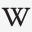
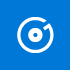
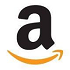
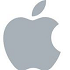

In [58]:
r = requests.get('http://www.bing.com/search?q=hello', headers={'User-Agent': 'Mozilla/5.0'})
school_ids = BeautifulSoup(r.text, "html.parser").findAll('cite')
school_ids 
    

In [63]:
a.findAll('cite')[1].text

'www.hellomagazine.com'

In [50]:
r.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=site:ncaa.com/schools+Northern+Illinois&amp;gbv=1&amp;sei=YwHNVpHLOYiWmQHk3K24Cw</title></head>\n<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById(\'captcha\');if(e){e.focus();}">\n<div style="max-width:400px;">\n<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>\n<form action="index" method="post">\n<script src="https://www.google.com/recaptcha/api.js" async defer></script>\n<noscript>\nTo continue, please type the characters below:<br><br>\n<img src="/sorry/image?id=3800498641070159524&amp;q=EgQoihb5GNK-r8wFIhkA8aeDSzzAgIiXclczxngp7fqmEyN7u_dnMgNyY24&amp;hl=en&amp;continue=https://www.google.com/search%3Fq%3Dsite:ncaa.com/schools%2BNorthern%

In [47]:
[team for team in schools if team not in logos]

['Miami',
 'NC St',
 'Northern Illinois',
 "Saint Mary's",
 'South Alabama',
 'South Florida',
 'Southeastern Louisiana',
 'Southern Illinois',
 'Southern Mississippi',
 "St John's",
 "St Mary's",
 'Texas A&M',
 'The Citadel',
 'USC',
 'Western Carolina',
 'Western Kentucky',
 'Western Michigan',
 'William & Mary']

In [18]:
no_logo = []
for team in logos:
    if logos[team] == 'No image found':
        no_logo.append(team)
        #logos.pop(team,None)
len(no_logo)

0

['Austin Peay St',
 'Central Arkansas',
 'Central Florida',
 'Central Michigan',
 'Coastal Carolina',
 'College of Charleston',
 'Eastern Illinois',
 'Florida Atlantic',
 'Florida Gulf Coast',
 'Georgia Southern',
 'Harvard , Utah',
 'Louisiana-Lafayette',
 'LouisianaLafayette',
 'Miami',
 'Mississippi',
 'NC St',
 'Northern Illinois',
 'Northern Iowa',
 "Saint Mary's",
 'South Alabama',
 'South Florida',
 'Southeastern Louisiana',
 'Southern Illinois',
 'Southern Mississippi',
 "St John's",
 "St Mary's",
 'Texas A&M',
 'The Citadel',
 'USC',
 'Western Carolina',
 'Western Kentucky',
 'Western Michigan',
 'William & Mary']

Austin Peay St
<cite>www.ncaa.com/schools/<b>austin</b>-<b>peay</b></cite>
found  Austin Peay St
Central Arkansas
<cite>www.ncaa.com/schools/<b>central</b>-ark</cite>
found  Central Arkansas
Central Florida
<cite>www.ncaa.com/schools/ucf</cite>
found  Central Florida
Central Michigan
<cite>www.ncaa.com/schools/<b>central</b>-mich</cite>
found  Central Michigan
Coastal Carolina
<cite>www.ncaa.com/schools/<b>coastal</b>-caro/basketball-men</cite>
found  Coastal Carolina
College of Charleston
<cite>www.ncaa.com/schools/col-of-<b>charleston</b></cite>
found  College of Charleston
Eastern Illinois
<cite>www.ncaa.com/schools/<b>eastern</b>-ill</cite>
found  Eastern Illinois
Florida Atlantic
<cite>www.ncaa.com/schools/fla-<b>atlantic</b></cite>
found  Florida Atlantic
Florida Gulf Coast
<cite>www.ncaa.com/schools/fgcu</cite>
found  Florida Gulf Coast
Georgia Southern
<cite>www.ncaa.com/schools/<b>ga</b>-<b>southern</b></cite>
found  Georgia Southern
Harvard , Utah
<cite>www.ncaa.com/schools/<

In [38]:
logos

{'Air Force': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/air-force.40.png',
 'Alabama': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/alabama.40.png',
 'Appalachian St': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/appalachian-st.40.png',
 'Arizona': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/arizona.40.png',
 'Arizona St': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/arizona-st.40.png',
 'Arkansas': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/arkansas.40.png',
 'Auburn': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/a/auburn.40.png',
 'BYU': 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/b/byu.40.png',
 'Ball St': 'http://i.tu

In [ ]:
logos["St John's"]

'citadel'

In [ ]:
soup

In [207]:
import /
Image(url= 'http://localhost:8888/static/base/images/logo.pang')

In [212]:


    

print(response.status_code)

200


In [ ]:
'Louisiana-Lafayette',
 'Louisiana–-Lafayette',
    'Louisville',
 'Louisvlle',
 'Lousiville',
    'louisville'
    


In [194]:
sorted(list(df_all.TEAM_PARSED.unique()))

['Air Force',
 'Alabama',
 'Appalachian St',
 'Arizona',
 'Arizona St',
 'Arkansas',
 'Auburn',
 'Austin Peay St',
 'BYU',
 'Ball St',
 'Baylor',
 'Boise St',
 'Boston College',
 'Bryant',
 'Butler',
 'Cal Poly',
 'Cal St Bakersfield',
 'Cal St Fullerton',
 'Cal state Fullerton',
 'California',
 'Campbell',
 'Canisius',
 'Central Arkansas',
 'Central Florida',
 'Central Michigan',
 'Charlotte',
 'Cincinnati',
 'Clemson',
 'Coastal Carolina',
 'College of Charleston',
 'Colorado',
 'Colorado St',
 'Connecticut',
 'Creighton',
 'Dallas Baptist',
 'Davidson',
 'Dayton',
 'Drake',
 'Duke',
 'East Carolina',
 'Eastern Illinois',
 'Elon',
 'FIU',
 'Florida',
 'Florida Atlantic',
 'Florida Gulf Coast',
 'Florida St',
 'Fresno St',
 'George Mason',
 'George Washington',
 'Georgetown',
 'Georgia',
 'Georgia Southern',
 'Georgia Tech',
 'Gonzaga',
 'Harvard',
 'Harvard , Utah',
 'Hawaii',
 'Houston',
 'Illinois',
 'Indiana',
 'Indiana St',
 'Iowa',
 'Iowa St',
 'James Madison',
 'Kansas',
 'Kans

In [189]:
df_all[df_all.TEAM_PARSED.str.contains('Harvard , Utah')]

,RK,SEASON,SPORT,WEEK,TEAM,WEEK_PARSED,WEEK_NUM,TEAM_PARSED
24,25.0,2014,basketball,Preseason Oct 31,"Harvard т, Utah т","[Preseason, Oct, 31]",Preseason,"Harvard , Utah"


In [139]:
df_all.TEAM_PARSED.map(lambda x: re.search("\d", x))

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
445    None
446    None
447    None
448    None
449    None
450    None
451    None
452    None
453    None
454    None
455    None
456    None
457    None
458    None
459    None
460    None
461    None
462    None
463    None
464    None
465    None
466    None
467    None
468    None
469    None
470    None
471    None
472    None
473    None
474    None
Name: TEAM_PARSED, Length: 14419, dtype: object

In [175]:
for sport in ['baseball','basketball','football']: 
    print(sport,':',len(df_all[(df_all.RK <= 25) & (df_all.SPORT == sport)
                              & (df_all.WEEK_NUM == 
                                 str(max(pd.to_numeric(df_all[(df_all.SPORT == sport) &  (df_all.WEEK_NUM != 'Preseason')].WEEK_NUM)))
                                )
                              ].TEAM_PARSED.unique()))
    

for sport in ['baseball','basketball','football']: 
    print(sport,':',len(df_all[(df_all.RK <= 25) & (df_all.SPORT == sport)
                              & (df_all.WEEK_NUM == 
                                 str(max(pd.to_numeric(df_all[(df_all.SPORT == sport) &  (df_all.WEEK_NUM != 'Preseason')].WEEK_NUM)))
                                )
                              ].TEAM_PARSED.unique()))
    
    
for sport in ['baseball','basketball','football']: 
    print(df_all[(df_all.SPORT == sport)].groupby(['SEASON']).size())
    
    

baseball : 63
basketball : 36
football : 47
baseball : 63
basketball : 36
football : 47
SEASON
2007    540
2008    540
2009    570
2010    570
2011    570
2012    570
2013    570
2014    540
2015    570
2016    479
dtype: int64
SEASON
2007    500
2008    475
2009    475
2010    475
2011    475
2012    500
2013    500
2014    475
2015    475
2016    475
dtype: int64
SEASON
2007    400
2008    425
2009    400
2010    400
2011    400
2012    400
2013    425
2014    425
2015    400
2016    400
dtype: int64


In [50]:
a = [1,2,3,4]
b = [1,2,3]

In [171]:
max(pd.to_numeric(df_all[(df_all.SPORT == sport) &  (df_all.WEEK_NUM != 'Preseason')].WEEK_NUM)).str
                                

AttributeError: 'numpy.int64' object has no attribute 'str'

19

30      [Week, 1, Feb, 25]
31      [Week, 1, Feb, 25]
32      [Week, 1, Feb, 25]
33      [Week, 1, Feb, 25]
34      [Week, 1, Feb, 25]
35      [Week, 1, Feb, 25]
36      [Week, 1, Feb, 25]
37      [Week, 1, Feb, 25]
38      [Week, 1, Feb, 25]
39      [Week, 1, Feb, 25]
40      [Week, 1, Feb, 25]
41      [Week, 1, Feb, 25]
42      [Week, 1, Feb, 25]
43      [Week, 1, Feb, 25]
44      [Week, 1, Feb, 25]
45      [Week, 1, Feb, 25]
46      [Week, 1, Feb, 25]
47      [Week, 1, Feb, 25]
48      [Week, 1, Feb, 25]
49      [Week, 1, Feb, 25]
50      [Week, 1, Feb, 25]
51      [Week, 1, Feb, 25]
52      [Week, 1, Feb, 25]
53      [Week, 1, Feb, 25]
54      [Week, 1, Feb, 25]
55      [Week, 1, Feb, 25]
56      [Week, 1, Feb, 25]
57      [Week, 1, Feb, 25]
58      [Week, 1, Feb, 25]
59      [Week, 1, Feb, 25]
              ...         
445     [Week, 18, Mar, 6]
446     [Week, 18, Mar, 6]
447     [Week, 18, Mar, 6]
448     [Week, 18, Mar, 6]
449     [Week, 18, Mar, 6]
450    [Week, 19, Mar, 13]
4

In [72]:
df_all['WEEK_PARSED'] = df_all.WEEK_PARSED

In [28]:
dfs['basketball'][dfs['basketball'].SEASON == 2007]

,RK,SEASON,WEEK,TEAM
0,1,2007,Preseason Nov 5[1],North Carolina 29
1,2,2007,Preseason Nov 5[1],UCLA 24
2,3,2007,Preseason Nov 5[1],Memphis 18
3,4,2007,Preseason Nov 5[1],Kansas
4,5,2007,Preseason Nov 5[1],Georgetown 1
5,6,2007,Preseason Nov 5[1],Louisville
6,7,2007,Preseason Nov 5[1],Tennessee
7,8,2007,Preseason Nov 5[1],Michigan State
8,9,2007,Preseason Nov 5[1],Indiana
9,10,2007,Preseason Nov 5[1],Washington State


In [8]:
request.urlopen('link')

ValueError: unknown url type: 'link'

In [3]:
sport

NameError: name 'sport' is not defined